## Simple Regression with Gradient Descent (GD) & Stochastic Gradient Descent (SGD)

In [94]:
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
import argparse
import numpy.linalg as la

In [95]:
# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean =np.mean(X,axis=0)
    std =np.std(X,axis=0)
    return mean, std

In [96]:
# Standardize the features of the examples in X by subtracting their mean and 
# dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
  S = np.zeros(X.shape)
  S= (X-mean)/std 
  return S

In [97]:
# Read data matrix X and labels t from text file.
def read_data(file_name):
  data=np.loadtxt(file_name)   
  #  Your code here. Load data features in X and labels in t.
  X = data[:,:-1]
  t = data[:,-1]
  return X, t

## cost function
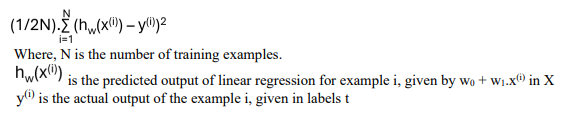

In [98]:
# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
  predictions = np.dot(X, w)
  error = predictions-t
  cost = (1/(2*len(t)))*np.dot(error.T,error)
  return cost

## gradient function
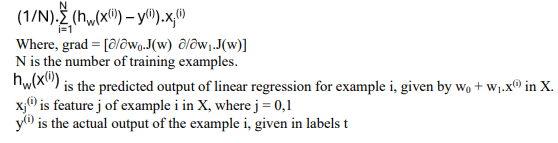

In [99]:
# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    predictions = np.dot(X, w)
    error = predictions - t
    gradient = (1 / len(t)) * np.dot(X.T, error)
    return gradient

In [100]:
# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    predictions = np.dot(X, w)
    mse = np.mean((predictions - t) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [101]:
# Implement gradient descent algorithm to compute w = [w0, w1].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        gradient = compute_gradient(X, t, w)
        w -= eta * gradient
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w, ep, costs

In [102]:
# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1].
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        # Randomly shuffling the data for each epoch
        indices = np.arange(len(t))
        np.random.shuffle(indices)
        XShuffs = X[indices]
        tShuffs = t[indices]
        for i in range(len(t)):
            gradient=compute_gradient(XShuffs[i:i+1],tShuffs[i:i+1],w)
            w-=eta*gradient
        if epoch%10 == 0:
            cost=compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w,ep,costs

# Main Program

In [103]:

##======================= Main program =======================##
parser = argparse.ArgumentParser('Simple Regression Exercise.')
parser.add_argument('-i', '--input_data_dir',
                    type=str,
                    default='../data/simple',
                    help='Directory for the simple houses dataset.')
FLAGS, unparsed = parser.parse_known_args()

In [104]:
# Reading training and test data.
Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/train.txt")
Xtest, ttest = read_data(FLAGS.input_data_dir + "/test.txt")

### Trainning data

In [105]:
Xtrain

array([[3032.],
       [2078.],
       [2400.],
       [2128.],
       [1404.],
       [1299.],
       [1672.],
       [2468.],
       [1191.],
       [1840.],
       [3360.],
       [1968.],
       [1450.],
       [2893.],
       [1319.],
       [1588.],
       [2600.],
       [2700.],
       [3266.],
       [1569.],
       [3754.],
       [1422.],
       [1280.],
       [2905.],
       [1404.],
       [1569.],
       [1624.],
       [2488.],
       [1690.],
       [2482.],
       [2998.],
       [3870.],
       [2268.],
       [3805.],
       [2422.],
       [1348.],
       [3991.],
       [1752.],
       [3352.],
       [1747.],
       [1960.],
       [3220.],
       [3600.],
       [1498.],
       [3372.],
       [2504.],
       [2068.],
       [2285.],
       [2920.],
       [3200.]])

In [106]:
ttrain

array([525000., 230000.,  87000., 180000., 183000., 135000., 117300.,
       233000., 165000., 199000., 310700., 152000., 136000., 360000.,
       134500., 144400., 410000., 169900., 379000., 149000., 550000.,
       147000., 154000., 223500., 141500., 140000., 167000., 279000.,
       215000., 271000., 329000., 375000., 242500., 475000., 384000.,
       175000., 375000., 168500., 439000., 265000., 250000., 300000.,
       399000., 145000., 385000., 210200., 195500., 320000., 312000.,
       290000.])

### Testing Data

In [107]:
Xtest 

array([[5000.],
       [1961.],
       [2799.],
       [1614.],
       [3531.],
       [1319.],
       [2804.],
       [2200.],
       [ 912.],
       [1800.],
       [1768.],
       [2596.],
       [1822.],
       [1634.],
       [1422.],
       [1092.],
       [2420.],
       [1569.],
       [3787.],
       [2844.],
       [2760.],
       [1746.],
       [1422.],
       [4190.],
       [3130.]])

In [108]:
ttest

array([415000., 178000., 315000., 150000., 355000., 136000., 460000.,
       282000., 126000., 165400., 203500., 222000., 234000., 158000.,
       142500., 148000., 205000., 140000., 425000., 370000., 200000.,
       150000., 142500., 395000., 188000.])

In [109]:
#setting Mean, std and intializing Xtrain,Xtest 
mean , std = mean_std(Xtrain)

In [110]:
# Standardize the training and test features using the mean and std computed over training.
Xtrain = np.hstack((np.ones((Xtrain.shape[0], 1)), standardize(Xtrain, mean, std)))
Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), standardize(Xtest, mean, std)))

In [111]:
# Computing parameters for each training method for eta=0.1 and 200 epochs
eta=0.1
epochs=200

In [112]:
# using GD
w,eph,costs=train(Xtrain,ttrain,eta,epochs)

### Model parameters GD

In [113]:
# Printing model parameters GD
print('Params GD: ', w)

Params GD:  [254449.99982048  93308.92004027]


### Cost & RMSE :
### For GD

In [114]:
# Print cost and RMSE on training data.     # GD
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain, ttrain, w))

Training RMSE: 64083.51.
Training cost: 2053348364.32.


In [115]:
# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest, ttest, w))

Test RMSE: 65773.19.
Test cost: 2163056350.22.


### Plotting (Epochs vs Cost) for (GD) methods

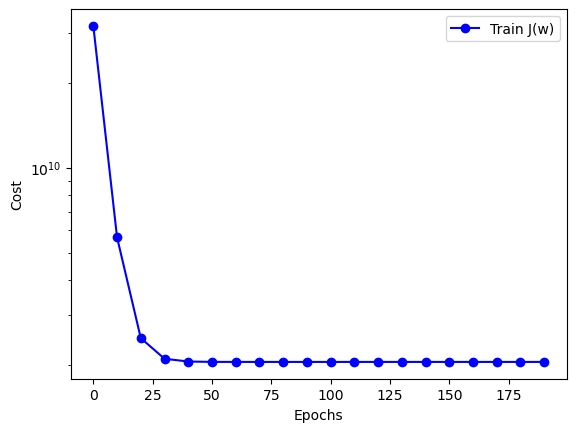

In [116]:
# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph, costs, 'bo-', label='Train J(w)')
plt.legend()
plt.show()
plt.close()

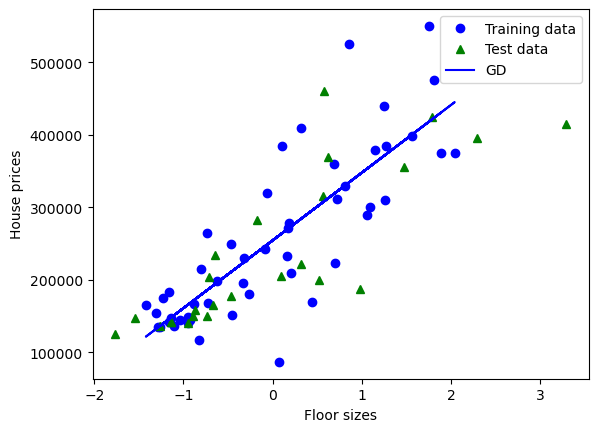

In [117]:
# Plotting linear approximation for each training method
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w), 'b', label='GD')
plt.legend()
plt.show()
#plt.savefig('train-test-line.png')
plt.close()


###  .......................................
### SGD

In [118]:
# Compute parameters using SGD
w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

In [119]:
# Print model parameters for SGD
print('Params SGD: ', w_sgd)

Params SGD:  [240272.8349804  91445.8797681]


In [120]:
# Print cost and RMSE on training data for SGD
print('Training RMSE SGD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
print('Training cost SGD: %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

Training RMSE SGD: 65659.42.
Training cost SGD: 2155579827.96.


In [121]:
# Print cost and RMSE on test data for SGD
print('Test RMSE SGD: %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
print('Test cost SGD: %0.2f.' % compute_cost(Xtest, ttest, w_sgd))

Test RMSE SGD: 62756.84.
Test cost SGD: 1969210497.24.


### Plotting (Epochs vs Cost) for (SGD) methods

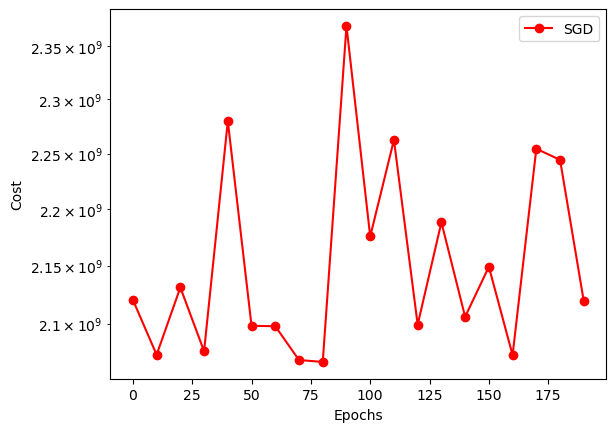

In [122]:
# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph_sgd, costs_sgd, 'ro-', label='SGD')  # Plot SGD
plt.legend()
plt.show()
plt.close()

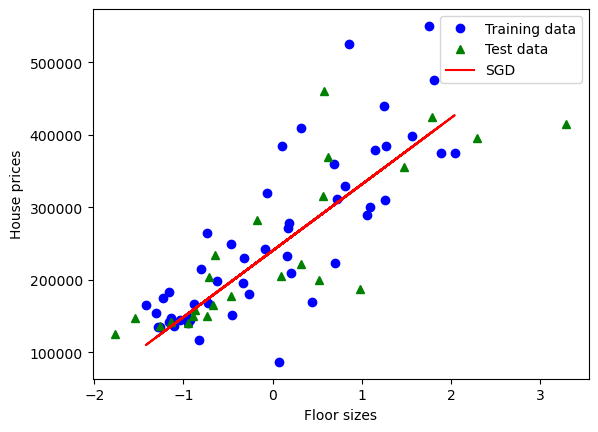

In [123]:
# Plotting linear approximation for each training method
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w_sgd), 'r', label='SGD')
plt.legend()
plt.show()
plt.savefig('train-test-line.png')
plt.close()

### Comparision between GD vs SGD

Params GD:  [254449.99982048  93308.92004027]
Training RMSE: 64083.51.
Training cost: 2053348364.32.
Test RMSE: 65773.19.
Test cost: 2163056350.22.
Params SGD:  [233373.489914    88922.55732815]
Training RMSE SGD: 67602.93.
Training cost SGD: 2285078092.23.
Test RMSE SGD: 61695.01.
Test cost SGD: 1903137068.36.


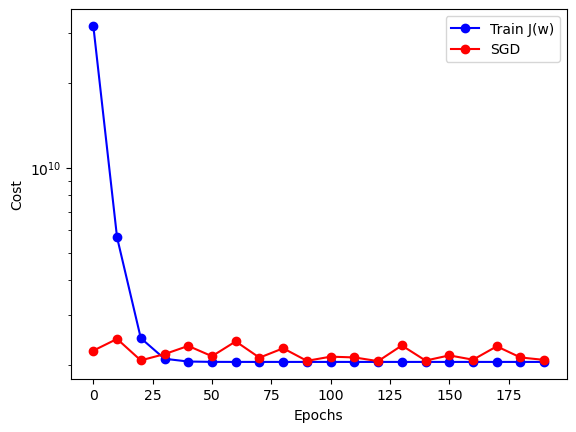

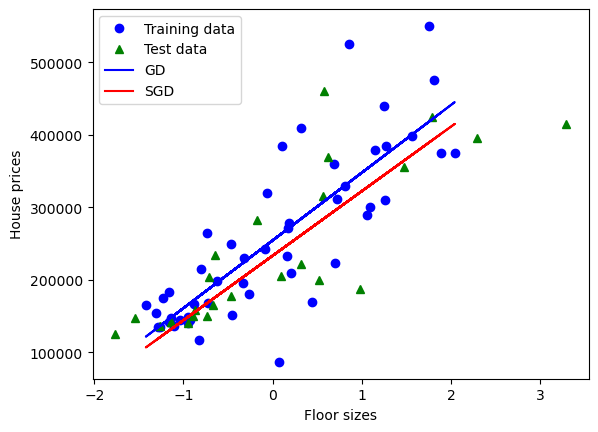

In [124]:
# Print model parameters.
print('Params GD: ', w)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain, ttrain, w))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest, ttest, w))

# Compute parameters using SGD
w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

# Print model parameters for SGD
print('Params SGD: ', w_sgd)

# Print cost and RMSE on training data for SGD
print('Training RMSE SGD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
print('Training cost SGD: %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

# Print cost and RMSE on test data for SGD
print('Test RMSE SGD: %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
print('Test cost SGD: %0.2f.' % compute_cost(Xtest, ttest, w_sgd))


# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph, costs, 'bo-', label='Train J(w)')
plt.plot(eph_sgd, costs_sgd, 'ro-', label='SGD')  # Plot SGD
plt.legend()
plt.show()
plt.close()

# Plotting linear approximation for each training method
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w), 'b', label='GD')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w_sgd), 'r', label='SGD')
plt.legend()
plt.show()
#plt.savefig('train-test-line.png')
plt.close()